# Research Skills: Image Analysis 
## Take-home Assignment - Part 2 and 3
Sharon Ong, Department of Cognitive Science and Artificial Intelligence 

Tilburg University
Academic Year 2022-2023

Your First Name: Wafa

Your Last Name: Mohamed 

Your Student ID: 2097778

Please include any special instructions to run your code, references to any code, methods, ideas that are not your own or not provided in this course here. 

https://stackoverflow.com/questions/31877353/overlay-an-image-segmentation-with-numpy-and-matplotlib

https://forum.image.sc/t/how-to-dilate-skeleton-based-on-vessel-diamater/65549/3

https://stackoverflow.com/questions/51043824/how-to-find-shortest-path-in-skeletonized-maze-image

https://www.learndatasci.com/glossary/jaccard-similarity/#:~:text=The%20Jaccard%20similarity%20is%20calculated,the%20union%20of%20two%20sets.

# PACKAGES

In [1]:
%matplotlib inline

import numpy as np

from skimage import io, color
from skimage import data
import sknw

from skimage.filters import median , apply_hysteresis_threshold
from skimage.util import random_noise, img_as_float
from skimage.transform import rescale
from skimage.morphology import medial_axis, skeletonize, thin, remove_small_objects


import matplotlib.pyplot as plt
from skimage import data, color, exposure, feature
from skimage.transform import hough_line, hough_line_peaks, hough_circle, hough_circle_peaks, probabilistic_hough_line
from skimage.util import img_as_ubyte
from scipy import ndimage as ndi
from skimage.morphology import dilation, erosion, disk, opening, closing, reconstruction, extrema, binary_closing
from skimage.filters import roberts, sobel, sobel_h, sobel_v, prewitt, prewitt_v, prewitt_h, scharr, frangi, hessian, sato

from scipy.fftpack import fftn, ifftn, fftshift, ifftshift
from skimage.filters import threshold_otsu, try_all_threshold, threshold_local, rank,  gaussian , threshold_niblack

from skimage.morphology import disk, star, diamond, square, ball, square
import scipy.ndimage.filters
from skimage.morphology import dilation, erosion, opening, closing, white_tophat, black_tophat
from skimage.morphology import binary_dilation, binary_erosion, binary_opening, binary_closing

from skimage import data, io, segmentation, color, filters
from skimage.util import img_as_float, img_as_ubyte
from skimage.color import label2rgb
import math

from skimage.measure import label, regionprops, regionprops_table
import pandas as pd
from skimage.segmentation import watershed

## Part 2: Extracting vessels from raw fundus images

1. (5 points) Load the color image. Using subplots, display each color channel separately.

   Points breakdown: 2 points for loading the image and 3 points for displaying with titles.

   **Display the image with an appropriate title.**

(-0.5, 1499.5, 798.5, -0.5)

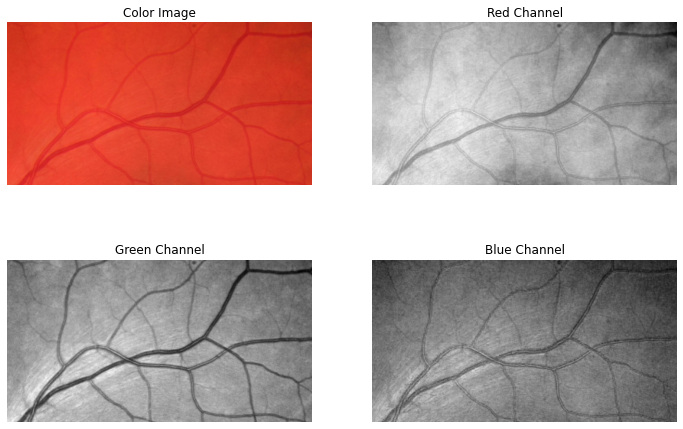

In [2]:
im_color= io.imread("2097778_vesselimage.jpg")

plt.figure(figsize=(12,8))
plt.subplot(221); plt.imshow(im_color); plt.title('Color Image'); plt.axis('off')
plt.subplot(222); plt.imshow(im_color[:,:,0],cmap='gray'); plt.title('Red Channel'); plt.axis('off')
plt.subplot(223); plt.imshow(im_color[:,:,1],cmap='gray'); plt.title('Green Channel'); plt.axis('off')
plt.subplot(224); plt.imshow(im_color[:,:,2],cmap='gray'); plt.title('Blue Channel'); plt.axis('off')

2. (5 points) Convert the color image to HSV and display the hue, saturation and value channels.

   Points breakdown: 2 points for loading the image and 3 points for displaying with titles.


(-0.5, 1499.5, 798.5, -0.5)

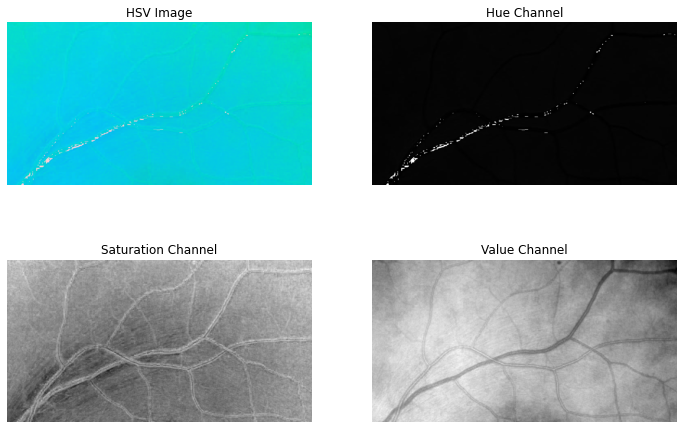

In [3]:
imhsv = color.rgb2hsv(im_color)
plt.figure(figsize=(12,8))
plt.subplot(221); plt.imshow(imhsv); plt.title('HSV Image'); plt.axis('off')
plt.subplot(222); plt.imshow(imhsv[:,:,0],cmap='gray'); plt.title('Hue Channel'); plt.axis('off')
plt.subplot(223); plt.imshow(imhsv[:,:,1],cmap='gray'); plt.title('Saturation Channel'); plt.axis('off')
plt.subplot(224); plt.imshow(imhsv[:,:,2],cmap='gray'); plt.title('Value Channel'); plt.axis('off')

3. (20 points) Segment the vessels to obtain a binary image where pixels representing the vessels are set to 1. You should compare two different image segmentation algorithms. You can apply morphological operations on these images.

   Points breakdown: Maximum of 10 points for each method. Comparing two thresholding algorithms only counts for 1 method. Report the steps you took to compute two image segmentation algorithms as comments in your code. Display the results of image processing at each step with appropriate titles. For each method: Full (10) points if each method successfully segments all the large vessels, most of the smaller vessels and none of the background. Show the results for each step you took. If the vessel shapes are slightly distorted or a 10% of the background is segmented or 50% of the smaller vessels are missing, you will get a maximum of 7 points each. If you make an attempt and the results are poor, you can get a maximum of 5 points each.

   **Report the steps you took to compute two image segmentation algorithms as comments in your code. Display the results of image processing at each step with appropriate titles.**

(Text(0.5, 1.0, 'Extracted Vessels after \n Morphological black_tophat'),
 (-0.5, 1499.5, 798.5, -0.5))

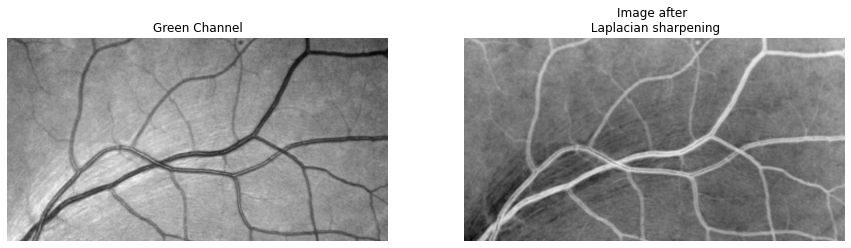

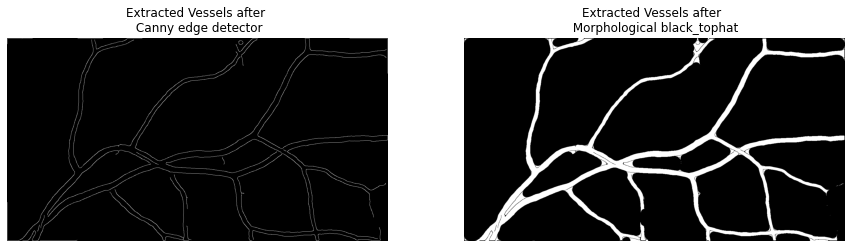

In [50]:
# Step 1: Extract the green channel, because it has better contrast compared to the red and the blue channel
im_color= io.imread("2097778_vesselimage.jpg")
green_channel = im_color[:,:,1]

# Step 2: Normalize the green channel so that the intensity of the image is between 0-255
normalized_img = (green_channel - np.amin(green_channel))*255.0 /(np.amax(green_channel)-np.amin(green_channel))  

# Step 3: I Used the Laplacian filter to sharpen the image so that vessels are highlighted
kernel = np.ones((3,3))*(-1) 
kernel[1,1] =4
Lap = scipy.ndimage.filters.convolve(normalized_img , kernel) 
image = normalized_img +Lap 

# Step 4: To enhance the high-frequency components of the vessels I used butterworth filter with very small cutoff
image = filters.butterworth(image,cutoff_frequency_ratio=0.0009, high_pass=True)

# Step 4: To extract vessels/find magnitude of the vessels I used canny edge detector. 
# I tried different sigma and threshold values,subsequently I choose the best one
canny = feature.canny(image, sigma=3.8, low_threshold=56, high_threshold=112)  

# Step 5: To remove small dark spots/background/noise I used morphological closing with a structuring element of 5
Extractedvessels  = closing(canny, square(5))

# Step 6: To return vessels that are smaller than the specified structuring element, I used black_tophat with a disk of 15
Extractedvessels1 = black_tophat(Extractedvessels,  disk (15))

plt.figure(figsize=(15,5)),plt.subplot(121), plt.imshow(green_channel, cmap='gray'),
plt.title('Green Channel'),plt.axis('off')

plt.subplot(122),plt.imshow(image, cmap='gray'),plt.title('Image after \n Laplacian sharpening'),plt.axis('off')

plt.figure(figsize=(15,15)),plt.subplot(121), plt.imshow(canny, cmap='gray')
plt.title('Extracted Vessels after \n Canny edge detector'),plt.axis('off')

plt.subplot(122), plt.imshow(Extractedvessels1, cmap='gray'),
plt.title('Extracted Vessels after \n Morphological black_tophat'),plt.axis('off')

(Text(0.5, 1.0, 'Extracted Vessels after \n Roberts edge detector'),
 (-0.5, 1499.5, 798.5, -0.5))

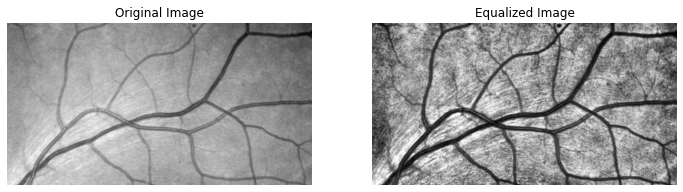

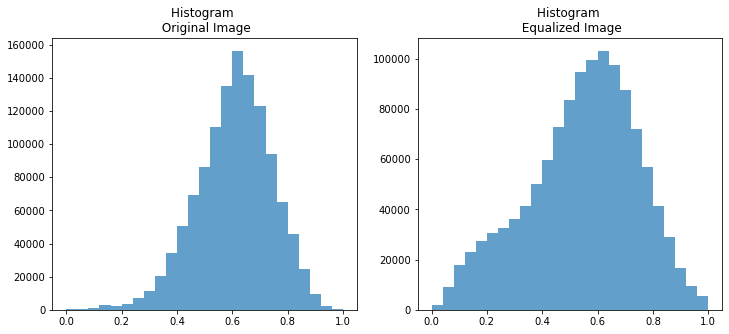

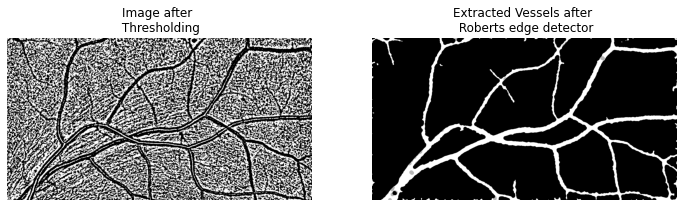

In [55]:
# Step1: convert the original image into grayscale image
im2 = color.rgb2gray(im_color)

# Step 2:Normalize grayscale image so that the intensity of the image is between 0 and 1 
im2 = (im2 - im2.min())/(im2.max() - im2.min())


# Step 3: For pre-pocessing I Applied adaptive histogram equalization to improve the local contrast of the vessels
im1 =  exposure.equalize_adapthist(im2, nbins=255, clip_limit=0.02)
fig, axs = plt.subplots(1, 2, figsize = (12,8))
axs[0].imshow(im2, cmap = "gray")
axs[0].set_title("Original Image")
axs[0].axis("off")
axs[1].imshow(im1, cmap = "gray")
axs[1].set_title("Equalized Image")
axs[1].axis("off")

fig, axs = plt.subplots(1, 2, figsize = (12,5))
n, bins, patches  = axs[0].hist(im2.ravel(), alpha = 0.7, bins = 25)
axs[0].set_title("Histogram \n Original Image")
n, bins, patches  = axs[1].hist(im1.ravel(), alpha = 0.7, bins = 25)
axs[1].set_title("Histogram \n Equalized Image")


# Step 4: Apply adaptive/local thresholding to get the areas of interests/vessels
block_size = 29 
# after trying different block-size, block-size of 29 delivered best result in combination with other methods used
imbw = im1 > threshold_local(im1, block_size,method = 'gaussian')   

# Step 5:I applied dilation to get bright regions/vessels and to remove noise/background/. this would make for the edge detector easier to extract edges that are vessels
imbw2 = dilation(imbw, diamond(2))

# Step 6: before applying the edge detector and extracting the vessels, I filled holes/separeted area
fill_gray = ((ndi.binary_fill_holes(imbw2, np.ones((5,5)))))

# Step 7: denoise the image using median filter
fill_gray = median(fill_gray, diamond (4))

#Step 8: I Applied Roberts edge detector to find the magnitude of vessels/extract vessels. 
# I tried different edge detectors such as prewitt and sobel, but Roberts gave the best result
Extractedvessels2 = roberts(fill_gray)


# Step 9: I applied morphogical closing to remove small dark spots/background/noise that are smaller than the specified SE
Extractedvessels2 = closing(Extractedvessels2,disk(9))

plt.figure(figsize = (12,12)), plt.subplot(121), plt.imshow(imbw, cmap='gray'), 
plt.title("Image after \n Thresholding"), plt.axis('off')
plt.subplot(122), plt.imshow(Extractedvessels2, cmap='gray'),
plt.title('Extracted Vessels after \n Roberts edge detector'),plt.axis('off')


4. (5 points) Overlay your segmentation solutions with the binary mask (manual annotation results).

   **Display the resulting images with appropriate titles.**

(-0.5, 1499.5, 798.5, -0.5)

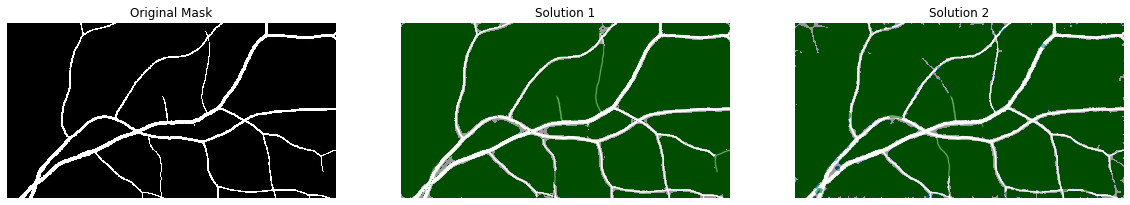

In [58]:
maskimage = io.imread("2097778_vesselmask.jpg")
plt.figure(figsize = (20,17))
plt.subplot(131)
plt.imshow(maskimage, cmap='gray', interpolation=  "none") 
plt.title("Original Mask")
plt.axis("off")

plt.subplot(132)
plt.imshow(maskimage, cmap='gray') 
plt.imshow(Extractedvessels1, cmap='ocean', alpha= 0.6,interpolation=  "none") 
plt.title("Solution 1")
plt.axis("off")

plt.subplot(133)
plt.imshow(maskimage, cmap='gray') 
plt.imshow(Extractedvessels2, cmap='ocean', alpha= 0.6, interpolation=  "none") 
plt.title("Solution 2")
plt.axis("off")

5. (5 points) Compute the Dice or Jaccard score between your solution and the binary mask.


In [59]:
intersection_first_solution = np.logical_and(maskimage,Extractedvessels1)
union_first_solution = np.logical_or(maskimage,Extractedvessels1)
jaccard_score_first_solution = np.sum(intersection_first_solution) / np.sum(union_first_solution)
print("The Jaccard score between the binary mask and the first solution is: ", jaccard_score_first_solution)

intersection_second_solution = np.logical_and(maskimage, Extractedvessels2)
union_second_solution = np.logical_or(maskimage,Extractedvessels2)
jaccard_score_second_solution = np.sum(intersection_second_solution) / np.sum(union_second_solution)
print("The Jaccard score between the binary mask and the second solution is: ", jaccard_score_second_solution)

The Jaccard score between the binary mask and the first solution is:  0.6407596430927334
The Jaccard score between the binary mask and the second solution is:  0.6113943808532778


## Part 3: Extracting vessels from raw fundus images

1. (2 points) Remove smaller vessels (less than 8 pixels wide) with morphological opening (after you load the image).

(<AxesSubplot:title={'center':'Image after \nOpening'}>,
 Text(0.5, 1.0, 'Image after \nOpening'))

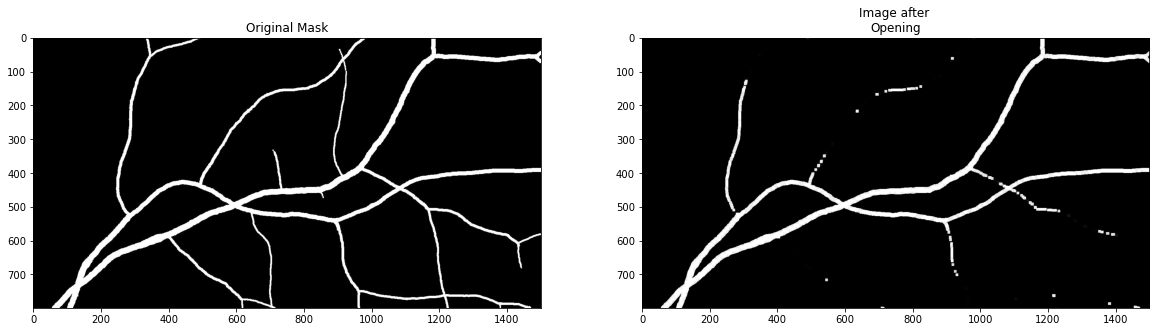

In [61]:
maskimage = io.imread("2097778_vesselmask.jpg")

se = square(8)
imd = opening(maskimage,se);

plt.figure(figsize = (20,20))
plt.subplot(121), plt.imshow(maskimage, cmap = "gray"), plt.title("Original Mask")
plt.subplot(122), plt.imshow(imd, cmap = "gray"), plt.title("Image after \nOpening")

2. (3 points) Apply morphological thinning to obtain a 1 pixel thin centerline of the vascular network.

(<AxesSubplot:title={'center':'Thinned Image'}>,
 Text(0.5, 1.0, 'Thinned Image'))

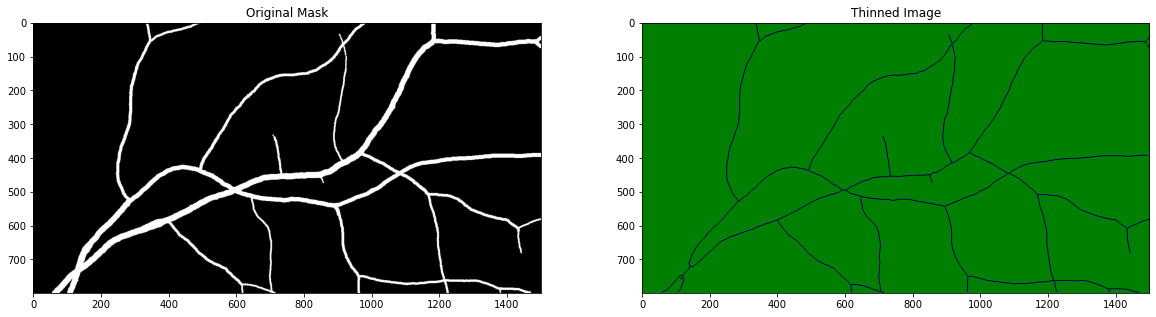

In [12]:
scaled_image = (maskimage - maskimage.min())/(maskimage.max() - maskimage.min())
binary_image = scaled_image > threshold_otsu(scaled_image)
thinned = thin(binary_image)

plt.figure(figsize = (20,20))
plt.subplot(121), plt.imshow(maskimage, cmap = "gray"), plt.title("Original Mask")
plt.subplot(122), plt.imshow(thinned, cmap = "ocean"), plt.title("Thinned Image")

3. (5 points) Find overall length of the vascular network in the image after thinning.

In [13]:
print("The overall length of the vascular network in the image after thinning is: ",  thinned.sum())

The overall length of the vascular network in the image after thinning is:  7149


4. (5 points) Find the length of the vascular network which is wider than 40 pixels. In other words, find the total length of all the vessels which are wider than 40 pixels. Hint: You can apply a medial axis transforms to compute the width of the vessel for the pixels of the skeleton

In [62]:
# s: skeleton, d: distance
s, d= medial_axis(maskimage,return_distance=True )
print("The maximum length of a vascular network is: ", d.max())
print( "There are", np.count_nonzero(d > 10), "vascular networks which are wider than 10 pixels")
print( "There are", np.count_nonzero(d > 40), "vascular networks which are wider than 40 pixels")

The maximum length of a vascular network is:  14.212670403551895
There are 467 vascular networks which are wider than 10 pixels
There are 0 vascular networks which are wider than 40 pixels


5. (5 points) Computer orientation of the vascular network in the image after thinning. Display the orientation distribution of the vascular network in a polar (rose) plot.

(10,)
[8 0 0 0 1 2 2 1 3 8]


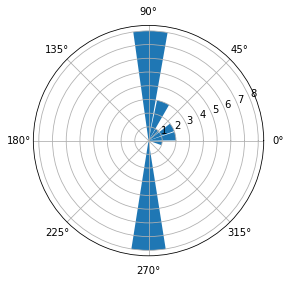

In [63]:
[H, theta, rho] = hough_line(thinned);
hspace, angles, dists = hough_line_peaks(H, theta, rho,num_peaks=25)

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
N = 10
radii = np.histogram(angles,bins=N)
atheta = np.linspace(min(angles), max(angles), N)
print(atheta.shape)
print(radii[0])

width = np.pi/N 
bars = plt.bar(atheta, radii[0], width=width, bottom=0.0)

6. (5 points) Compute the length and orientation of each branch (e.g. with the sknw package (https://github.com/Image-Py/sknw)).

In [67]:
label_seeds = np.asarray(maskimage)  # Convert the image into numpy array
binary_image = maskimage > threshold_otsu(maskimage)  # create a binary image using otsu thresholding
watershed_img = watershed(maskimage, label_seeds, mask=binary_image) # use watershed 
regions =regionprops(watershed_img) # use regionprops to get the properties of the watersheded image

orientation = []
for i in regions: ## get the orientation of the vessels/branches
    orientation.append(i.orientation)

centroids = [] 
for i in regions:  # Extract the centroids
    (centroids.append(i.centroid))

coords = [] 
for i in regions:  # Extract the coordinate of the branches/vessels
    (coords.append(i.coords))
    
pd_dataframe = pd.DataFrame(centroids)
pd_dataframe["Branch_orientation"] =orientation
pd_dataframe["Coords"] =coords

pd_dataframe.rename(columns = {0:'Centroid0'}, inplace = True)
pd_dataframe.rename(columns = {1:'Centroid1'}, inplace = True)
pd_dataframe.head()

,Centroid0,Centroid1,Branch_orientation,Coords
0,670.000000,197.000000,0.785398,"[[670, 197]]"
1,57.000000,1494.000000,0.785398,"[[57, 1494]]"
2,640.200000,1075.000000,1.316786,"[[508, 646], [563, 897], [579, 1369], [764, 10..."
3,451.714286,724.142857,1.143158,"[[9, 339], [289, 284], [446, 251], [534, 1172]..."
4,354.928571,1005.214286,-1.112892,"[[50, 1177], [50, 1465], [50, 1486], [53, 1254..."


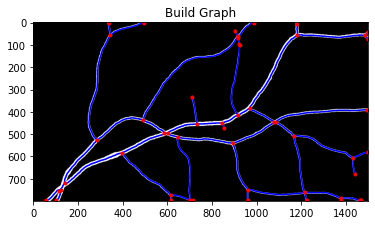

,c1,c2,length
0,0.167021,0.331013,0.163992
1,0.222754,0.151965,0.070789
2,0.099582,0.002010,0.097571
3,0.362612,0.168378,0.194234
4,0.073665,0.609334,0.535670
5,0.097836,0.752844,0.655008
6,0.190813,0.742048,0.551235
7,0.331122,0.072507,0.258615
8,0.003031,0.107186,0.104155
9,0.006259,0.551739,0.545480


In [68]:
binary_image = maskimage > threshold_otsu(maskimage)  # create a binary image using otsu thresholding
ske = skeletonize(binary_image) # skeletonize the binary image

graph = sknw.build_sknw(ske, multi=False) # use sknw to build a grap

plt.imshow(img, cmap='gray') 

for (s,e) in graph.edges(): # calculate the edges of the skeletonized image 
    ps = graph[s][e]['pts']
    plt.plot(ps[:,1], ps[:,0], 'blue')
    

nodes = graph.nodes() #  calculate the nodes/coordinates of the of de edges
ps = np.array([nodes[i]['o'] for i in nodes])
plt.plot(ps[:,1], ps[:,0], 'r.')

plt.title('Build Graph')
plt.show()

import networkx as nx
G = nx.path_graph(len(ps)) # use path_graph to create the vessel paths
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed = 42) # Create the layout of the vessels

length_of_vessels = pd.DataFrame(pos) # extract distance between different nodes/vessels
length_of_vessels = (length_of_vessels.transpose())
length_of_vessels.rename(columns = {0:'c1'}, inplace = True)
length_of_vessels.rename(columns = {1:'c2'}, inplace = True)
length_of_vessels.iloc[::1] = length_of_vessels.iloc[::1].abs()
length_of_vessels['length'] = length_of_vessels.c1 - length_of_vessels.c2
length_of_vessels.iloc[::1] = length_of_vessels.iloc[::1].abs()

length_of_vessels # length of the vessels